In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.81 ms (started: 2021-05-17 21:40:49 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.93 ms (started: 2021-05-17 21:40:49 +00:00)


# Malware prediction 

**This project is about calculating the probability of a given machine being infected by malware even before it actually is infected**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #importing packages


time: 964 ms (started: 2021-05-17 21:40:49 +00:00)


Since the dataset is huge , our first task to load the data successfully will be accomplished by reducing the memory requirements,so what we plan to do is as follows-

1.  We switch the binary values to int8
2.  we switch the binary values which contain the missing values to float16




In [ ]:
data_types = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }                                                                        #Encoding data types to reduce memory requirements
  

time: 77.4 ms (started: 2021-05-17 21:40:50 +00:00)


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/microsoft-malware-prediction.zip (Unzipped Files)/train.csv', dtype=data_types)

time: 2min 29s (started: 2021-05-17 21:40:50 +00:00)


In [ ]:
train_df.info() #info about training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float16 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float16 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float16 
 11  AVProductsEnabled                    

In [ ]:
#%time test_df = pd.read_csv('/content/drive/MyDrive/microsoft-malware-prediction.zip (Unzipped Files)/test.csv', dtype=data_types)

time: 1.19 ms (started: 2021-05-17 21:44:24 +00:00)


In [ ]:
#%time test_df.info()

time: 1.02 ms (started: 2021-05-17 21:44:24 +00:00)


In [ ]:
%time train_df.shape #getting idea about size of data set

CPU times: user 25 µs, sys: 1e+03 ns, total: 26 µs
Wall time: 32.7 µs


(8921483, 83)

time: 7.85 ms (started: 2021-05-17 21:44:24 +00:00)


In [ ]:
train_df.head() 

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014

time: 212 ms (started: 2021-05-17 21:44:24 +00:00)


# Exploratory Data analysis

In [ ]:
#test_df.head()

time: 996 µs (started: 2021-05-17 21:44:24 +00:00)


In [ ]:
%time train_df["HasDetections"].value_counts()#counting number of positive and negative observations.

CPU times: user 72.7 ms, sys: 2.98 ms, total: 75.7 ms
Wall time: 76.4 ms


0    4462591
1    4458892
Name: HasDetections, dtype: int64

time: 84.3 ms (started: 2021-05-17 21:44:24 +00:00)


CPU times: user 123 ms, sys: 7.03 ms, total: 130 ms
Wall time: 143 ms


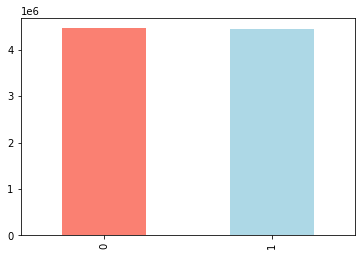

time: 302 ms (started: 2021-05-17 21:44:24 +00:00)


In [ ]:
 %time train_df["HasDetections"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);#graph showing number of posituve and negative observations

In [ ]:
%time obj = train_df.isnull().sum().sort_values(ascending=False)
for key,value in obj.iteritems():
    print(key,",",value)             #getting idea about number of null entries in each feature

CPU times: user 2.11 s, sys: 510 ms, total: 2.62 s
Wall time: 2.62 s
PuaMode , 8919174
Census_ProcessorClass , 8884852
DefaultBrowsersIdentifier , 8488045
Census_IsFlightingInternal , 7408759
Census_InternalBatteryType , 6338429
Census_ThresholdOptIn , 5667325
Census_IsWIMBootEnabled , 5659703
SmartScreen , 3177011
OrganizationIdentifier , 2751518
SMode , 537759
CityIdentifier , 325409
Wdft_IsGamer , 303451
Wdft_RegionIdentifier , 303451
Census_InternalBatteryNumberOfCharges , 268755
Census_FirmwareManufacturerIdentifier , 183257
Census_IsFlightsDisabled , 160523
Census_FirmwareVersionIdentifier , 160133
Census_OEMModelIdentifier , 102233
Census_OEMNameIdentifier , 95478
Firewall , 91350
Census_TotalPhysicalRAM , 80533
Census_IsAlwaysOnAlwaysConnectedCapable , 71343
Census_OSInstallLanguageIdentifier , 60084
IeVerIdentifier , 58894
Census_PrimaryDiskTotalCapacity , 53016
Census_SystemVolumeTotalCapacity , 53002
Census_InternalPrimaryDiagonalDisplaySizeInInches , 47134
Census_InternalPr

In [ ]:
%time display(train_df.describe(include='all').T) #further info on dataset

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MachineIdentifier,8921483,8921483,ffffff75ba4f33d938ccfdb148b8ea16,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,8921483,6,win8defender,8826520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineVersion,8921483,70,1.1.15200.1,3845067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppVersion,8921483,110,4.18.1807.18075,5139224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AvSigVersion,8921483,8531,1.273.1420.0,102317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Census_IsPenCapable,8.92148e+06,NaN,NaN,NaN,0.0380709,0.191368,0,0,0,0,1
Census_IsAlwaysOnAlwaysConnectedCapable,8.85014e+06,NaN,NaN,NaN,NaN,0,0,0,0,0,1
Wdft_IsGamer,8.61803e+06,NaN,NaN,NaN,NaN,0,0,0,0,1,1
Wdft_RegionIdentifier,8.61803e+06,NaN,NaN,NaN,NaN,0,1,3,10,11,15


CPU times: user 50.3 s, sys: 200 ms, total: 50.5 s
Wall time: 50.2 s
time: 50.2 s (started: 2021-05-17 21:44:27 +00:00)


In [ ]:
features_dropped=[]

time: 1.56 ms (started: 2021-05-17 21:45:18 +00:00)


In [ ]:
(train_df.isnull().sum()/train_df.shape[0]).sort_values(ascending=False)#finding the % of features to be dropped 

PuaMode                       0.999741
Census_ProcessorClass         0.995894
DefaultBrowsersIdentifier     0.951416
Census_IsFlightingInternal    0.830440
Census_InternalBatteryType    0.710468
                                ...   
Census_OSVersion              0.000000
Census_HasOpticalDiskDrive    0.000000
Census_DeviceFamily           0.000000
Census_MDC2FormFactor         0.000000
MachineIdentifier             0.000000
Length: 83, dtype: float64

time: 2.35 s (started: 2021-05-17 21:45:18 +00:00)


We can easily see from above that features named as "PuaMode " and "Census_ProcessorClass" consists of more than 99% of missing values so it is safe to drop these columns

In [ ]:
features_dropped.append('PuaMode')
features_dropped.append('Census_ProcessorClass')
features_dropped.append('MachineIdentifier')#dropping useless features

time: 2.48 ms (started: 2021-05-17 21:45:20 +00:00)


# Removing Skewed Features

In [ ]:
skewed_df = pd.DataFrame([{'column': c, 'uniq': train_df[c].nunique(), 'skewness': train_df[c].value_counts(normalize=True).values[0] * 100} for c in train_df.columns])
skewed_df = skewed_df.sort_values('skewness', ascending=False)
skewed_df

,column,uniq,skewness
75,Census_IsWIMBootEnabled,2,99.999969
5,IsBeta,2,99.999249
69,Census_IsFlightsDisabled,2,99.998996
68,Census_IsFlightingInternal,2,99.998612
27,AutoSampleOptIn,2,99.997108
...,...,...,...
4,AvSigVersion,8531,1.146861
14,CityIdentifier,107366,1.102969
73,Census_FirmwareVersionIdentifier,50494,1.022799
44,Census_SystemVolumeTotalCapacity,536848,0.586324


time: 27 s (started: 2021-05-17 21:45:20 +00:00)


Now we can easily see that there are 15 columns which are highly skewed i.e have more than 98% skewness ,so we can remove them from our dataset.

In [ ]:
features_dropped.extend(skewed_df[skewed_df.skewness > 98].column.tolist())
features_dropped #features to be dropped

['PuaMode',
 'Census_ProcessorClass',
 'MachineIdentifier',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'ProductName',
 'HasTpm',
 'IsSxsPassiveMode']

time: 7.5 ms (started: 2021-05-17 21:45:47 +00:00)


In [ ]:
features_dropped.remove('PuaMode')#this feature has occurred twice in the features dropped list


train_df.drop(features_dropped, axis=1, inplace=True)
#test_df.drop(features_dropped, axis=1, inplace=True)



time: 437 ms (started: 2021-05-17 21:45:47 +00:00)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 66 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   EngineVersion                                      category
 1   AppVersion                                         category
 2   AvSigVersion                                       category
 3   RtpStateBitfield                                   float16 
 4   DefaultBrowsersIdentifier                          float16 
 5   AVProductStatesIdentifier                          float32 
 6   AVProductsInstalled                                float16 
 7   AVProductsEnabled                                  float16 
 8   CountryIdentifier                                  int16   
 9   CityIdentifier                                     float32 
 10  OrganizationIdentifier                             float16 
 11  GeoNameIdentifier                    

In [ ]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)    #checking how many of the labels are there with numeric content and empyty values

RtpStateBitfield
DefaultBrowsersIdentifier
AVProductStatesIdentifier
AVProductsInstalled
AVProductsEnabled
CityIdentifier
OrganizationIdentifier
GeoNameIdentifier
IsProtected
IeVerIdentifier
Firewall
Census_OEMNameIdentifier
Census_OEMModelIdentifier
Census_ProcessorCoreCount
Census_ProcessorManufacturerIdentifier
Census_ProcessorModelIdentifier
Census_PrimaryDiskTotalCapacity
Census_SystemVolumeTotalCapacity
Census_TotalPhysicalRAM
Census_InternalPrimaryDiagonalDisplaySizeInInches
Census_InternalPrimaryDisplayResolutionHorizontal
Census_InternalPrimaryDisplayResolutionVertical
Census_InternalBatteryNumberOfCharges
Census_OSInstallLanguageIdentifier
Census_FirmwareManufacturerIdentifier
Census_FirmwareVersionIdentifier
Census_IsAlwaysOnAlwaysConnectedCapable
Wdft_IsGamer
Wdft_RegionIdentifier
time: 1.15 s (started: 2021-05-17 21:45:48 +00:00)


In [ ]:
for col, val in train_df.items():
  if pd.api.types.is_numeric_dtype(val):
    train_df[col] = val.fillna(val.median()) #imputing the missing values with median of that column
  else:
     train_df[col] = train_df[col].cat.codes #encoding the categorical datatypes


 

time: 5.54 s (started: 2021-05-17 21:45:49 +00:00)


In [ ]:
obj = train_df.isnull().sum().sort_values(ascending=False)
for key,value in obj.iteritems():
    print(key,",",value) #checking number of null entries

HasDetections , 0
OsBuild , 0
Census_ProcessorModelIdentifier , 0
Census_ProcessorManufacturerIdentifier , 0
Census_ProcessorCoreCount , 0
Census_OEMModelIdentifier , 0
Census_OEMNameIdentifier , 0
Census_MDC2FormFactor , 0
Firewall , 0
SmartScreen , 0
IeVerIdentifier , 0
IsProtected , 0
SkuEdition , 0
OsBuildLab , 0
OsPlatformSubRelease , 0
OsSuite , 0
OsVer , 0
Wdft_RegionIdentifier , 0
Processor , 0
Platform , 0
LocaleEnglishNameIdentifier , 0
GeoNameIdentifier , 0
OrganizationIdentifier , 0
CityIdentifier , 0
CountryIdentifier , 0
AVProductsEnabled , 0
AVProductsInstalled , 0
AVProductStatesIdentifier , 0
DefaultBrowsersIdentifier , 0
RtpStateBitfield , 0
AvSigVersion , 0
AppVersion , 0
Census_PrimaryDiskTotalCapacity , 0
Census_PrimaryDiskTypeName , 0
Census_SystemVolumeTotalCapacity , 0
Census_HasOpticalDiskDrive , 0
Wdft_IsGamer , 0
Census_IsAlwaysOnAlwaysConnectedCapable , 0
Census_IsPenCapable , 0
Census_IsTouchEnabled , 0
Census_IsSecureBootEnabled , 0
Census_FirmwareVersionI

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 66 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   EngineVersion                                      int8   
 1   AppVersion                                         int8   
 2   AvSigVersion                                       int16  
 3   RtpStateBitfield                                   float16
 4   DefaultBrowsersIdentifier                          float16
 5   AVProductStatesIdentifier                          float32
 6   AVProductsInstalled                                float16
 7   AVProductsEnabled                                  float16
 8   CountryIdentifier                                  int16  
 9   CityIdentifier                                     float32
 10  OrganizationIdentifier                             float16
 11  GeoNameIdentifier                                 

Now what we are going to do is we are going to remove the highly correlated features to reduce the dimensionality of the dataset.Since dataset is too large its not a good idea to see all the correlation of all features at once,we will break the correlations into size of 15 features.

(15.5, -0.5)

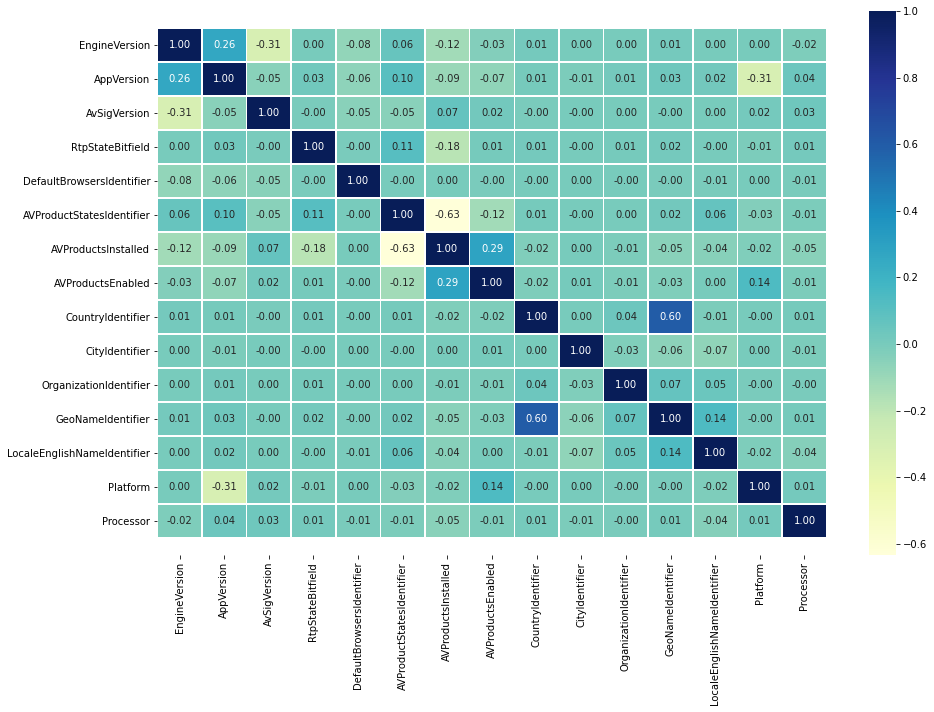

time: 7.34 s (started: 2021-05-17 21:45:56 +00:00)


In [ ]:
cols=train_df.columns.tolist()
cols_tmp=cols[:15]
corr_matrix = train_df[cols_tmp].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,                 linewidths=0.5,
   fmt=".2f", annot=True,

                 
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) #checking correlation between features

(15.5, -0.5)

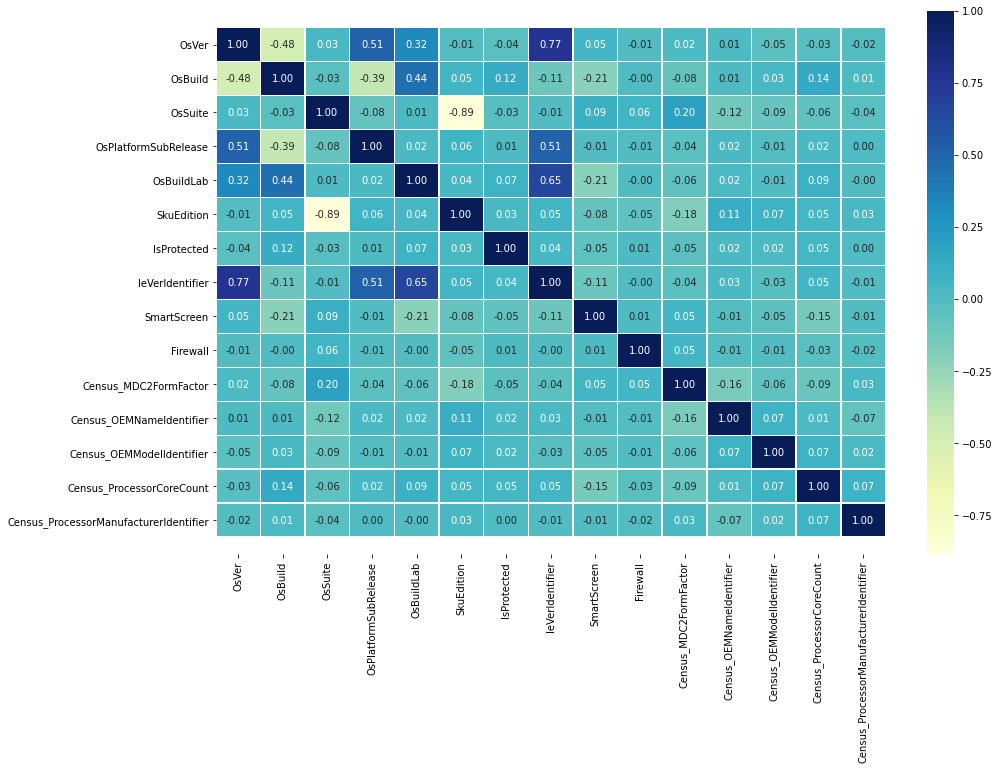

time: 6.9 s (started: 2021-05-17 21:46:04 +00:00)


In [ ]:
cols_tmp=cols[15:30]
corr_matrix = train_df[cols_tmp].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,                 linewidths=0.5,
   fmt=".2f", annot=True,

                 
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)#checking correlation between features

(15.5, -0.5)

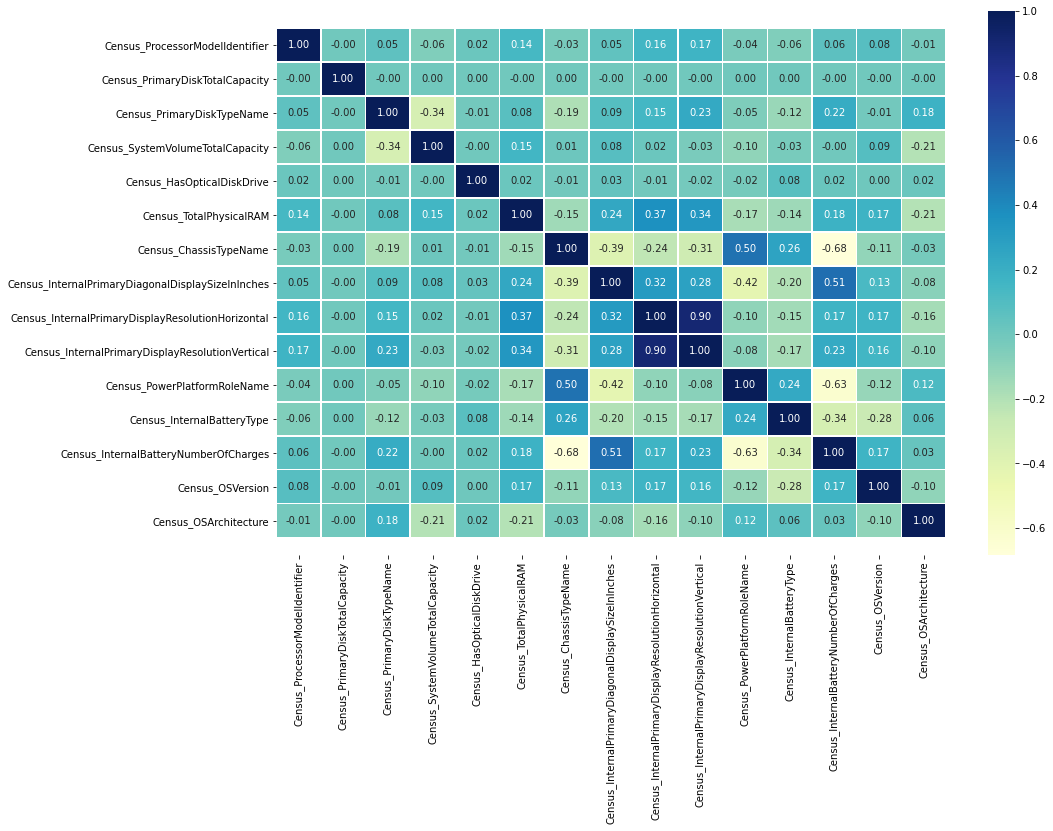

time: 7.12 s (started: 2021-05-17 21:46:10 +00:00)


In [ ]:
cols_tmp=cols[30:45]
corr_matrix = train_df[cols_tmp].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,                 linewidths=0.5,
   fmt=".2f", annot=True,

                 
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)#checking correlation between features

(15.5, -0.5)

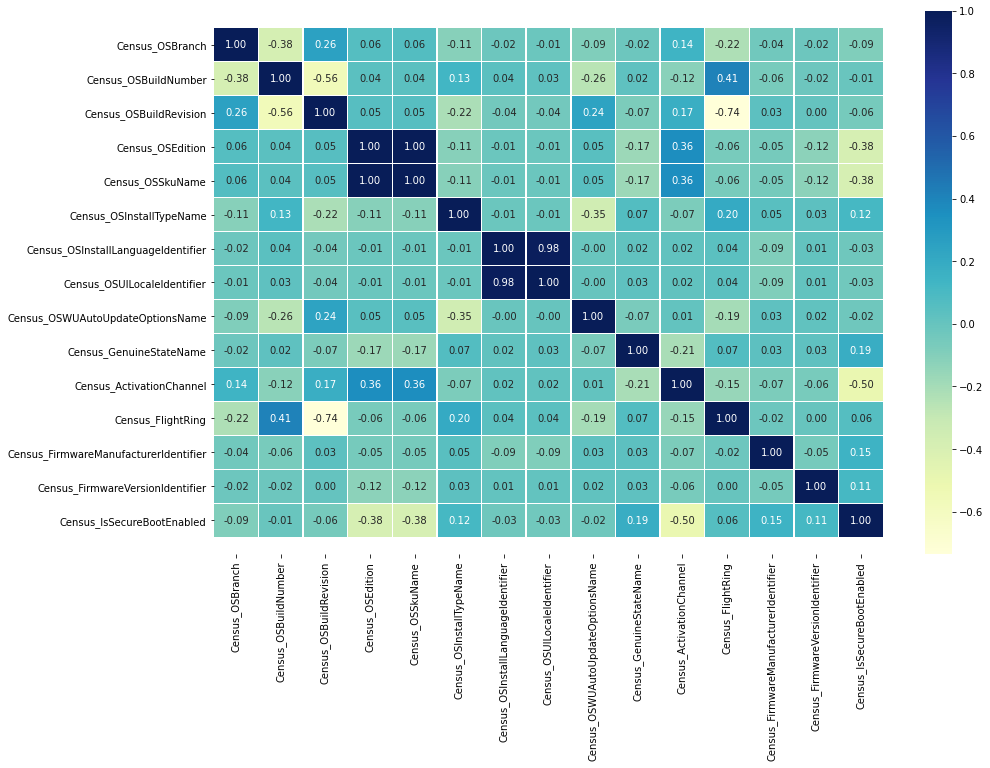

time: 6.96 s (started: 2021-05-17 21:46:18 +00:00)


In [ ]:
cols_tmp=cols[45:60]
corr_matrix = train_df[cols_tmp].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,                 linewidths=0.5,
   fmt=".2f", annot=True,

                 
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)#checking correlation between features

(6.5, -0.5)

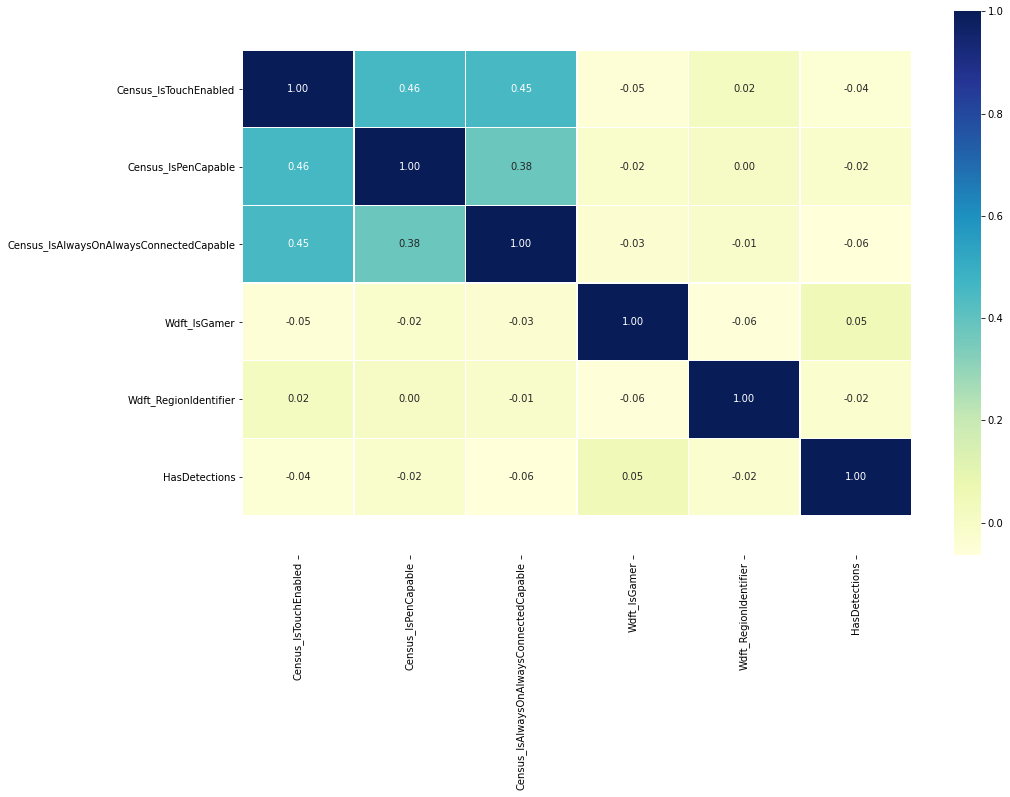

time: 1.88 s (started: 2021-05-17 21:46:25 +00:00)


In [ ]:
cols_tmp=cols[60:]
corr_matrix = train_df[cols_tmp].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,                 linewidths=0.5,
   fmt=".2f", annot=True,

                 
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)#checking correlation between features

Among all the correlation matrices above we can see that we will drop the columns which have higher correlation than 90%

In [ ]:
print(train_df.Census_OSInstallLanguageIdentifier.nunique())
print(train_df.Census_OSUILocaleIdentifier .nunique())
print(train_df.Census_InternalPrimaryDisplayResolutionHorizontal.nunique())
print(train_df.Census_InternalPrimaryDisplayResolutionVertical.nunique())#checking the number of unique values in the feaatures to be dropped

 

39
147
2050
1552
time: 346 ms (started: 2021-05-17 21:46:26 +00:00)


So between the highly correlated features such as "Census_OSInstallLanguageIdentifier" and "Census_OSUILocaleIdentifier" we notice that "Census_OSInstallLanguageIdentifier" contains less unique values,so we will drop these feature and similar logic applies to remaining two features.

In [ ]:
corr_features_dropped=[]
corr_features_dropped.append("Census_OSInstallLanguageIdentifier")
corr_features_dropped.append("Census_InternalPrimaryDisplayResolutionVertical")# dropping features


time: 3.11 ms (started: 2021-05-17 21:46:27 +00:00)


In [ ]:
train_df.drop(corr_features_dropped, axis=1, inplace=True)# dropping features

time: 588 ms (started: 2021-05-17 21:46:27 +00:00)


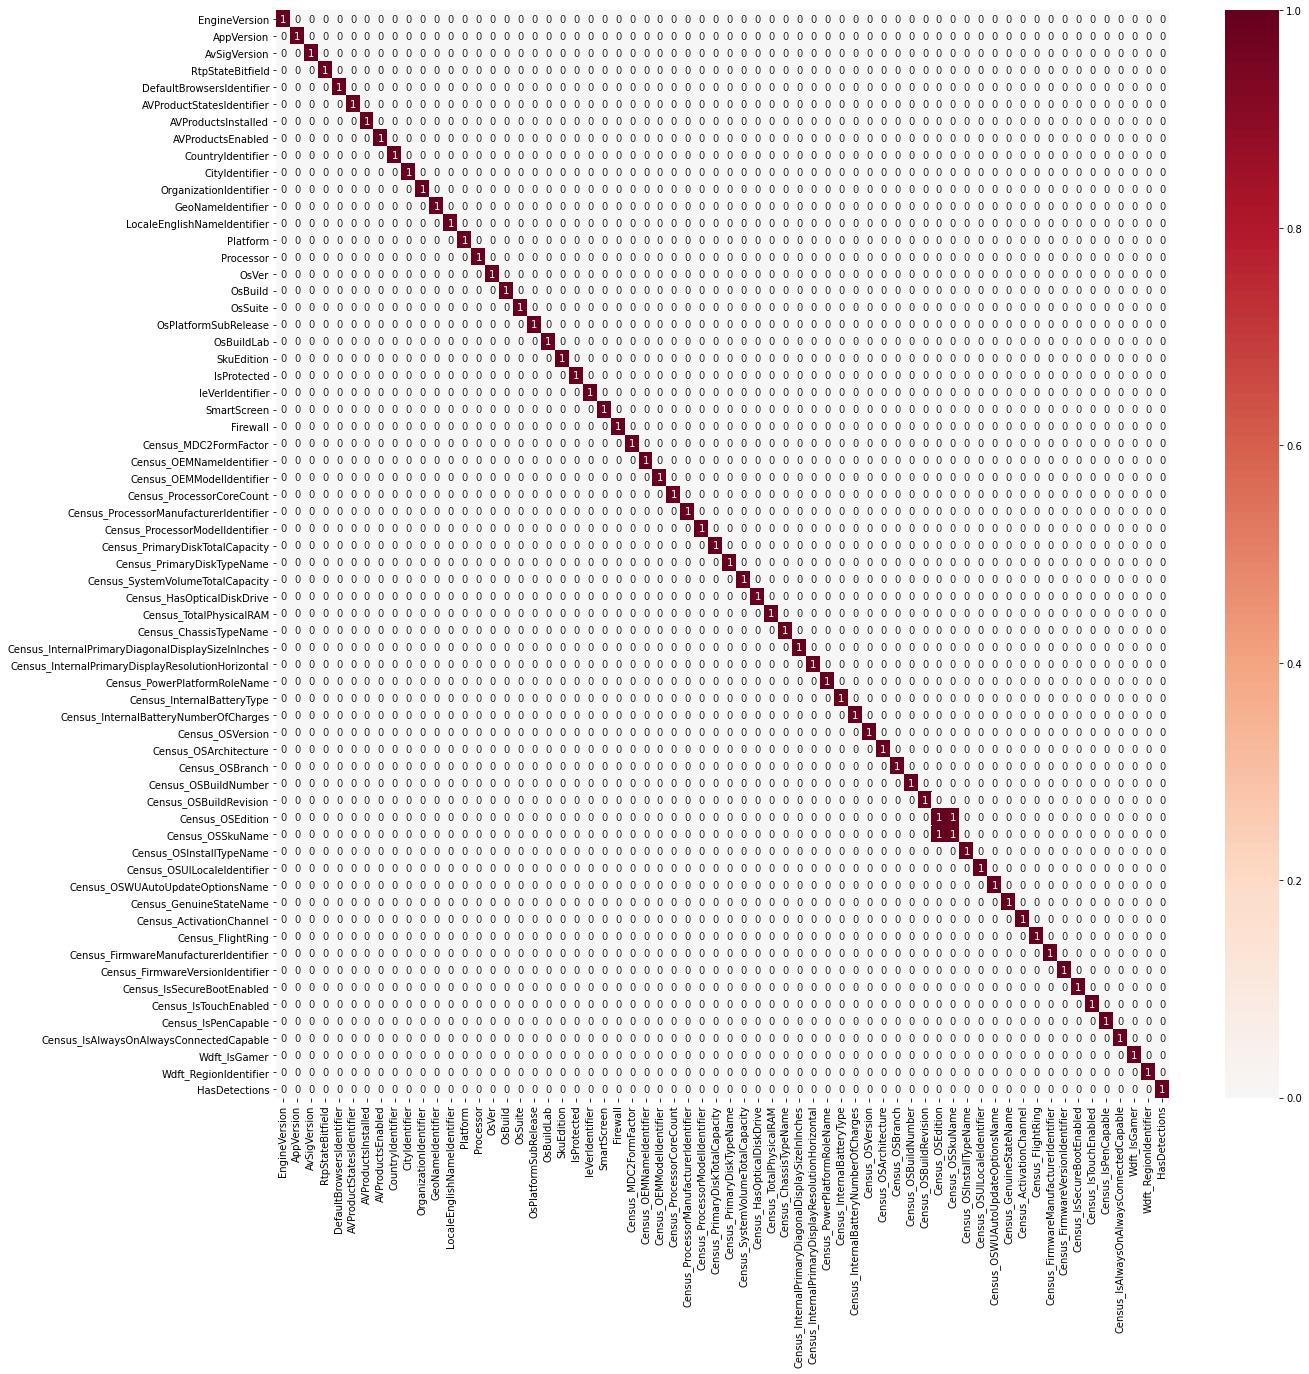

time: 1min 38s (started: 2021-05-17 21:46:27 +00:00)


In [ ]:
corr_matrix = train_df.corr()
high_corrrelation = (corr_matrix >= 0.99).astype('uint8')
plt.figure(figsize=(20,20))
sns.heatmap(high_corrrelation, cmap='RdBu_r', annot=True, center=0.0) #plotting correlation matrix
plt.show()

We see that two features namely "Census_OSEdition" and "Census_OSSkuName" are highly correlated so we will drop one out of them.

In [ ]:


print(train_df.Census_OSEdition.nunique())
print(train_df.Census_OSSkuName.nunique()) #checking number of unique values



33
30
time: 145 ms (started: 2021-05-17 21:48:06 +00:00)


we will remove "Census_OSSkuName" as it contains less number of unique values.



In [ ]:
train_df.drop("Census_OSSkuName", axis=1, inplace=True)#dropping features

time: 951 ms (started: 2021-05-17 21:48:06 +00:00)


# Training the model

In [ ]:
X=train_df.drop("HasDetections",axis=1)
y=train_df["HasDetections"]#spilting  data


time: 631 ms (started: 2021-05-17 21:48:07 +00:00)


In [ ]:
X=X[:10000]
y=y[:10000]#taking a small sample of data to train our model on.


time: 2.26 ms (started: 2021-05-17 21:48:08 +00:00)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve                          #importing important packages
np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)#spillting the dataset into training and testing or validation set


time: 639 ms (started: 2021-05-17 21:48:08 +00:00)


In [ ]:
models={"Logistic Regression":LogisticRegression(),"Random Forest":RandomForestClassifier(),"KNN": KNeighborsClassifier()}#models to be tested

time: 1.13 ms (started: 2021-05-17 21:48:09 +00:00)


In [ ]:
def fit(models,X_train,X_test,y_train,y_test):# function to determine the scores obtained from models
    np.random.seed(40)
    modelscores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        modelscores[name]=model.score(X_test,y_test)
    return modelscores                     

time: 2.72 ms (started: 2021-05-17 21:48:09 +00:00)


In [ ]:
%time modelscores=fit(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
modelscores#model scores

CPU times: user 2.54 s, sys: 151 ms, total: 2.69 s
Wall time: 2.58 s


{'KNN': 0.524, 'Logistic Regression': 0.5085, 'Random Forest': 0.617}

time: 2.59 s (started: 2021-05-17 21:48:09 +00:00)


In [ ]:
model_compare=pd.DataFrame(modelscores,index=["accuracy"])#comparing different model

time: 4.68 ms (started: 2021-05-17 21:48:11 +00:00)


In [ ]:
model_compare

,Logistic Regression,Random Forest,KNN
accuracy,0.5085,0.617,0.524


time: 19.5 ms (started: 2021-05-17 21:48:11 +00:00)


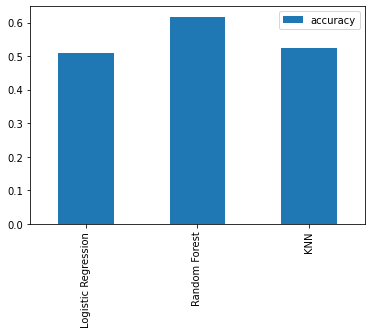

time: 197 ms (started: 2021-05-17 21:48:11 +00:00)


In [ ]:
model_compare.T.plot.bar();#bar graph to compare the accuracy between different model

# Tuning the Hyperparameters

In [ ]:
#first lets try to increase the efficiency of KNN
%time
trainscores=[]
testscores=[]
neighbors=range(1,30)
knn=KNeighborsClassifier()
for i in neighbors:
    
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    trainscores.append(knn.score(X_train,y_train))
    testscores.append(knn.score(X_test,y_test))#trying to improve efficiency of Kneighbors by chaning the value of K

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.2 µs
time: 49.1 s (started: 2021-05-17 21:48:12 +00:00)


In [ ]:
best_efficiency_in_train_scores=max(trainscores)
best_efficiency_in_test_scores=max(testscores)

time: 1.34 ms (started: 2021-05-17 21:49:01 +00:00)


In [ ]:
best_efficiency_in_train_scores

1.0

time: 7.22 ms (started: 2021-05-17 21:49:01 +00:00)


In [ ]:
best_efficiency_in_test_scores

0.532

time: 5.36 ms (started: 2021-05-17 21:49:01 +00:00)


We can clearly see that KNN model is overfitting and the reason is that because of excessive number of data points

Maximum KNN score on the test data: 53.20%


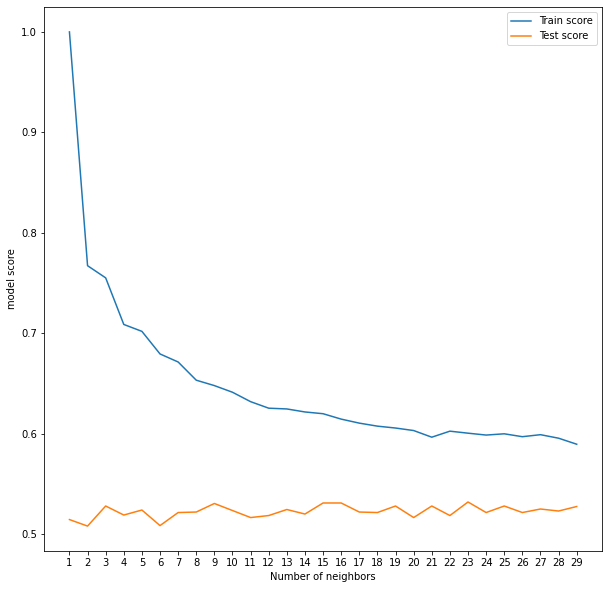

time: 399 ms (started: 2021-05-17 21:49:01 +00:00)


In [ ]:
plt.figure(figsize=(10,10)) 
plt.plot(neighbors,trainscores,label="Train score")
   
plt.plot(neighbors,testscores,label="Test score")
plt.xticks(np.arange(1,30,1))
plt.xlabel("Number of neighbors")
plt.ylabel("model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(testscores)*100:.2f}%")#plotting of KNN neighbors score wrt to different values of K

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 25),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1100, 50),
           "max_depth": [None, 3, 5, 11],
           "min_samples_split": np.arange(2, 26, 2),
           "min_samples_leaf": np.arange(1, 26, 2)}#grid on which we will apply Randomized search cv on logistic regression and Random forest classifier

time: 4.04 ms (started: 2021-05-17 21:49:01 +00:00)


In [ ]:
%time
np.random.seed(40)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=25,
                                verbose=True)
rs_log_reg.fit(X_train, y_train);#applying randomized search cv

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


time: 13.8 s (started: 2021-05-17 21:49:01 +00:00)


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   13.6s finished


In [ ]:
rs_log_reg.best_params_#best parameters of logisstic regression

{'C': 0.01, 'solver': 'liblinear'}

time: 5.73 ms (started: 2021-05-17 21:49:15 +00:00)


In [ ]:
%time
np.random.seed(40)
m=LogisticRegression(solver='liblinear',C=0.01).fit(X_train,y_train)
m.score(X_test,y_test)#best score obtained

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


0.5225

time: 103 ms (started: 2021-05-17 21:49:15 +00:00)


In [ ]:
%time
np.random.seed(40)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=25,
                           verbose=True)
rs_rf.fit(X_train, y_train);#applying 

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  8.2min finished


time: 8min 21s (started: 2021-05-17 21:49:15 +00:00)


In [ ]:
rs_rf.best_params_#best parameters for random forest classifier

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 22,
 'n_estimators': 810}

time: 4.83 ms (started: 2021-05-17 21:57:36 +00:00)


In [ ]:
rs_rf.score(X_test, y_test)# score for random forest classifier

0.629

time: 420 ms (started: 2021-05-17 21:57:36 +00:00)


In [ ]:
%time
log_reg_grid = {"C": np.logspace(-4, 4, 25),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train);#grid for appliying grid search cv

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


time: 13.8 s (started: 2021-05-17 21:57:37 +00:00)


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   13.7s finished


In [ ]:
gs_log_reg.best_params_#best parameters for grid search cv

{'C': 0.01, 'solver': 'liblinear'}

time: 5.36 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
gs_log_reg.score(X_test, y_test)#scores of grid search cv on logistic regression

0.5225

time: 11.7 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
y_pred=gs_log_reg.predict(X_test)# predicting our logistic regression model on test set

time: 6.02 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int8)

time: 4.2 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
from sklearn.metrics import plot_roc_curve

time: 2.25 ms (started: 2021-05-17 21:57:51 +00:00)


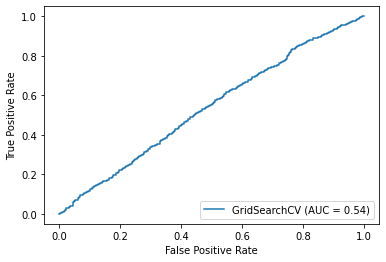

time: 294 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
plot_roc_curve(gs_log_reg,X_test,y_test);

We can see that our model performs better than just simply guessing which corresponds to a AUC score of 0.5

In [ ]:
print(confusion_matrix(y_test,y_pred))#confusion matrix

[[591 392]
 [563 454]]
time: 11.6 ms (started: 2021-05-17 21:57:51 +00:00)


(7.0, -1.0)

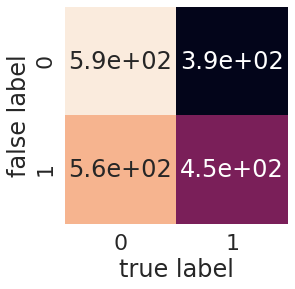

time: 212 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
import seaborn as sns
sns.set(font_scale=2)
def plot_confusion_matrix(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,
                  cbar=False)
    plt.xlabel("true label")
    plt.ylabel("false label")
plot_confusion_matrix(y_test,y_pred)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)#visualising confusion matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.60      0.55       983
           1       0.54      0.45      0.49      1017

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000

time: 12.7 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
gs_log_reg.best_params_

{'C': 0.01, 'solver': 'liblinear'}

time: 5.75 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_score

time: 1.89 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
m=LogisticRegression(
    C=46.41588833612773,solver="liblinear")

time: 2.63 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
cvs=cross_val_score(m,X,y,cv=5,scoring="accuracy")
cvs

array([0.524 , 0.5475, 0.505 , 0.5255, 0.531 ])

time: 607 ms (started: 2021-05-17 21:57:51 +00:00)


In [ ]:
cvs=np.mean(cvs)
cvs

0.5266

time: 9.5 ms (started: 2021-05-17 21:57:52 +00:00)


In [ ]:
cv_precision = np.mean(cross_val_score(m,
                                       X,
                                       y,
                                       cv=5, 
                                       scoring="precision"))
cv_precision


0.531573738742104

time: 626 ms (started: 2021-05-17 21:57:52 +00:00)


In [ ]:
cv_recall = np.mean(cross_val_score(m,
                                    X,
                                    y,
                                    cv=5, 
                                    scoring="recall")) 
cv_recall

0.5287128712871287

time: 640 ms (started: 2021-05-17 21:57:53 +00:00)


In [ ]:
cv_f1 = np.mean(cross_val_score(m,
                                X,
                                y,
                                cv=5, scoring="f1"))                
cv_f1

0.5285858005777585

time: 631 ms (started: 2021-05-17 21:57:53 +00:00)


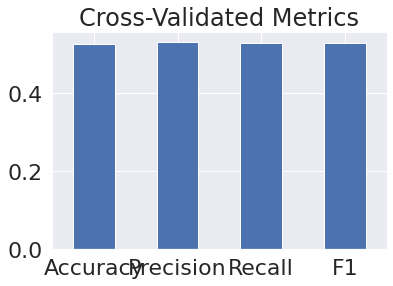

time: 237 ms (started: 2021-05-17 21:57:54 +00:00)


In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cvs,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
plot=cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.xticks(rotation=0);

In [ ]:
%time
m = RandomForestClassifier(n_estimators=160, min_samples_leaf=3, max_depth=None, min_samples_split=18 )
m.fit(X_train, y_train)
m.score(X_test,y_test)




CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


0.6165

time: 2.56 s (started: 2021-05-17 21:57:54 +00:00)


In [ ]:
fi = pd.DataFrame({'feature': X_train.columns, 'importance': m.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

,index,feature,importance
0,2,AvSigVersion,0.058370
1,33,Census_SystemVolumeTotalCapacity,0.049824
2,23,SmartScreen,0.049033
3,9,CityIdentifier,0.048409
4,55,Census_FirmwareVersionIdentifier,0.045174
...,...,...,...
57,59,Census_IsAlwaysOnAlwaysConnectedCapable,0.001153
58,58,Census_IsPenCapable,0.001113
59,24,Firewall,0.000644
60,15,OsVer,0.000635


time: 44.2 ms (started: 2021-05-17 21:57:57 +00:00)


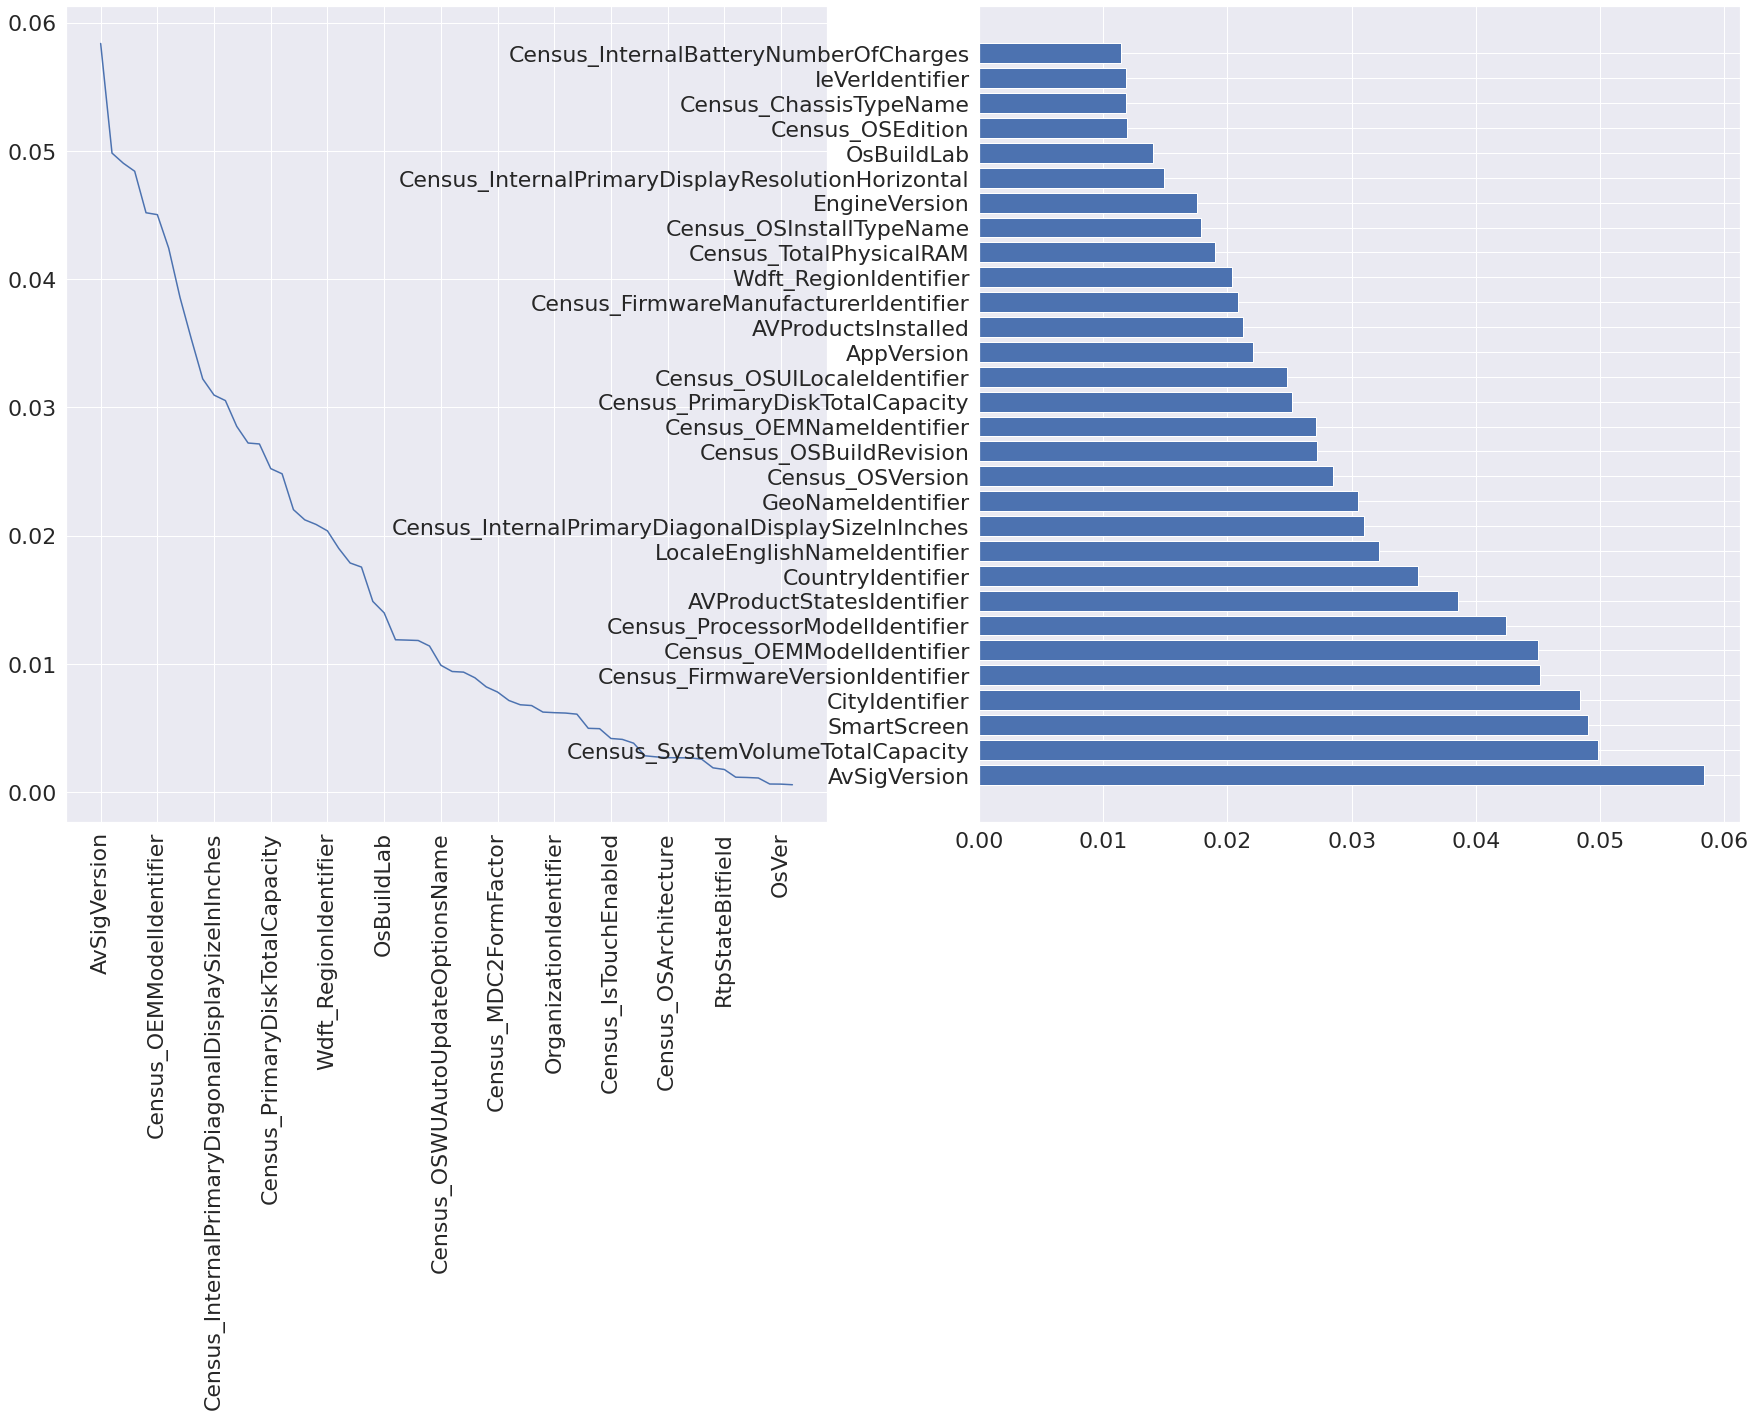

time: 1.66 s (started: 2021-05-17 21:57:57 +00:00)


In [ ]:
def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 5 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)
    
    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center')
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])

plot_feature_importance(fi)


In [ ]:
to_keep = fi.loc[fi['importance']>0.01, 'feature']
len(to_keep)

30

time: 5.95 ms (started: 2021-05-17 21:57:58 +00:00)


In [ ]:
X_keep = X.copy()[to_keep]
X_keep.sample(5)

,AvSigVersion,Census_SystemVolumeTotalCapacity,SmartScreen,CityIdentifier,Census_FirmwareVersionIdentifier,Census_OEMModelIdentifier,Census_ProcessorModelIdentifier,AVProductStatesIdentifier,CountryIdentifier,LocaleEnglishNameIdentifier,Census_InternalPrimaryDiagonalDisplaySizeInInches,GeoNameIdentifier,Census_OSVersion,Census_OSBuildRevision,Census_OEMNameIdentifier,Census_PrimaryDiskTotalCapacity,Census_OSUILocaleIdentifier,AppVersion,AVProductsInstalled,Census_FirmwareManufacturerIdentifier,Wdft_RegionIdentifier,Census_TotalPhysicalRAM,Census_OSInstallTypeName,EngineVersion,Census_InternalPrimaryDisplayResolutionHorizontal,OsBuildLab,Census_OSEdition,Census_ChassisTypeName,IeVerIdentifier,Census_InternalBatteryNumberOfCharges
1241,1012,242944.0,-1,3137.0,38239.0,225814.0,3082.0,53447.0,110,-74,15.500000,211.0,153,165,525.0,244198.0,125,27,1.0,142.0,3.0,16384.0,4,32,1920.0,131,4,12,137.0,8.900000e+01
6790,904,190326.0,5,148234.0,70889.0,331458.0,3428.0,53447.0,35,75,17.296875,277.0,154,167,525.0,476940.0,31,27,1.0,142.0,4.0,4096.0,1,32,1600.0,131,1,12,137.0,0.000000e+00
4899,1238,317789.0,5,50306.0,53174.0,327855.0,240.0,53447.0,93,75,18.500000,277.0,156,228,585.0,953869.0,31,27,1.0,127.0,8.0,4096.0,6,33,1366.0,131,10,3,137.0,4.294967e+09
2426,998,236336.0,5,130897.0,51646.0,131628.0,124.0,53447.0,55,75,17.203125,277.0,136,431,4144.0,476940.0,31,27,1.0,142.0,10.0,4096.0,8,32,1600.0,128,1,6,117.0,2.810000e+02
4562,1318,99434.0,2,66953.0,31629.0,202591.0,1998.0,53447.0,89,75,11.601562,277.0,16,17443,525.0,476940.0,31,38,1.0,142.0,1.0,2048.0,2,33,1366.0,17,1,12,53.0,0.000000e+00


time: 114 ms (started: 2021-05-17 21:57:58 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_keep,
                                                    y,
                                                    test_size=0.2)

time: 8.19 ms (started: 2021-05-17 21:57:59 +00:00)


In [ ]:
m = RandomForestClassifier(n_estimators=160, min_samples_leaf=3, max_depth=None, min_samples_split=18 )
%time m.fit(X_train, y_train)
m.score(X_test,y_test)


CPU times: user 2.65 s, sys: 11.8 ms, total: 2.66 s
Wall time: 2.66 s


0.6325

time: 2.76 s (started: 2021-05-17 21:57:59 +00:00)


We can easily see that by doing feature engineering our model accuracy has gone up

In [ ]:
fi = pd.DataFrame({'feature': X_train.columns, 'importance': m.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

,index,feature,importance
0,0,AvSigVersion,0.066237
1,2,SmartScreen,0.062912
2,1,Census_SystemVolumeTotalCapacity,0.057746
3,3,CityIdentifier,0.057201
4,4,Census_FirmwareVersionIdentifier,0.054004
5,6,Census_ProcessorModelIdentifier,0.052775
6,5,Census_OEMModelIdentifier,0.051018
7,8,CountryIdentifier,0.041950
8,10,Census_InternalPrimaryDiagonalDisplaySizeInInches,0.038650
9,7,AVProductStatesIdentifier,0.038406


time: 49.5 ms (started: 2021-05-17 21:58:01 +00:00)


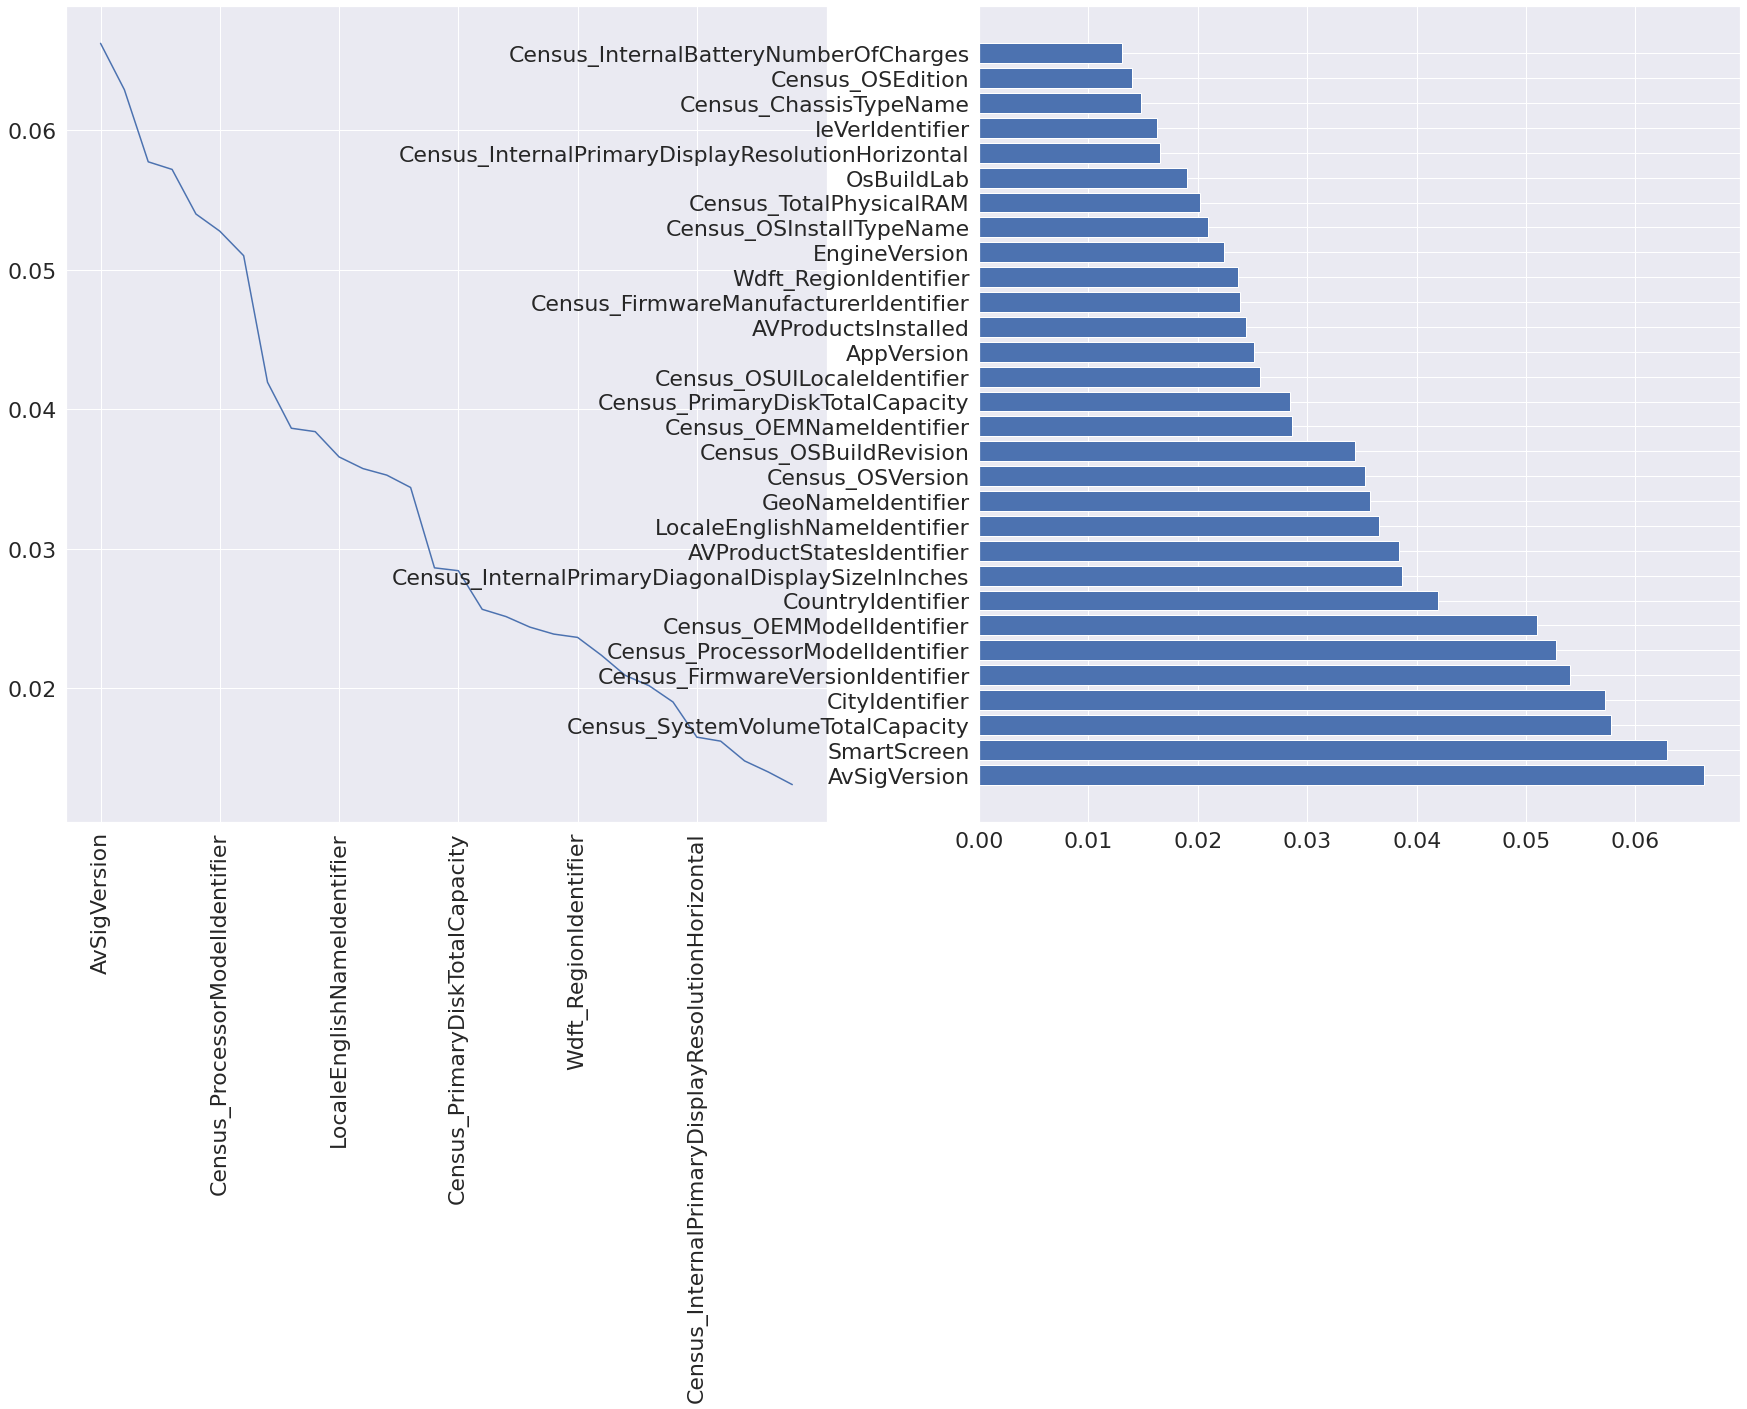

time: 1.29 s (started: 2021-05-17 21:58:01 +00:00)


In [ ]:
plot_feature_importance(fi)

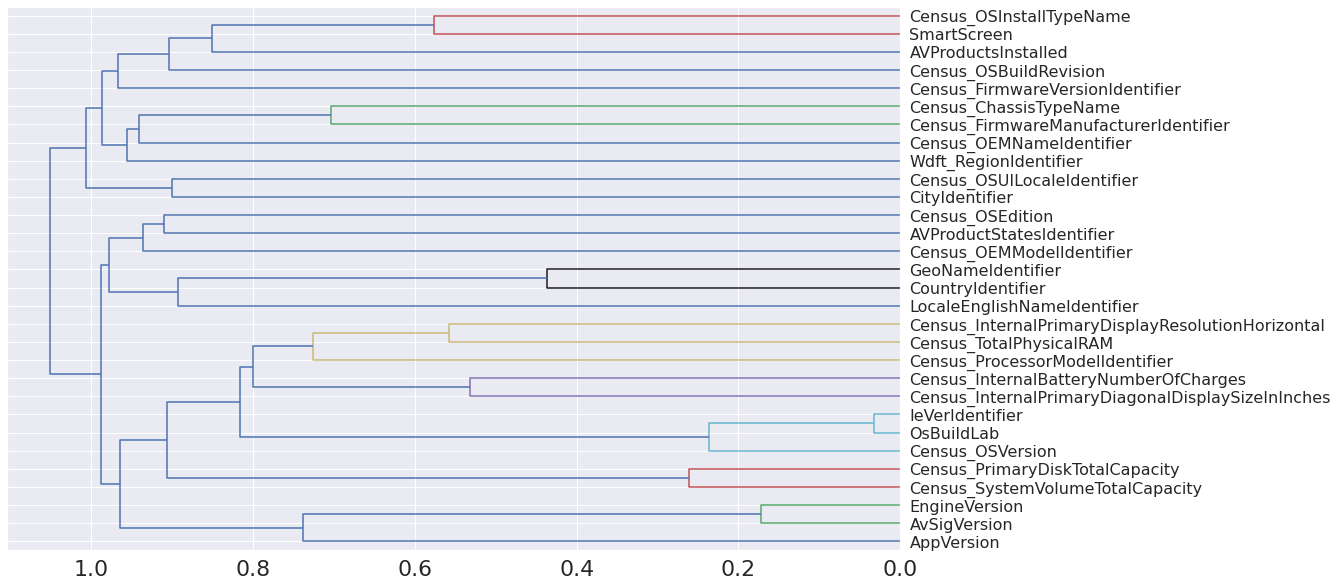

time: 754 ms (started: 2021-05-17 21:58:03 +00:00)


In [ ]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

From this dendogram we can easily see the correlation of our features

In [ ]:
%time
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
                               
lgb_model.fit(X_train,y_train)
lgb_model.score(X_test,y_test)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


0.6055

time: 468 ms (started: 2021-05-17 22:15:48 +00:00)


In [ ]:
y_pred=lgb_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))#confusion matrix

[[578 385]
 [404 633]]
time: 4.8 s (started: 2021-05-17 21:58:46 +00:00)


(7.5, -1.5)

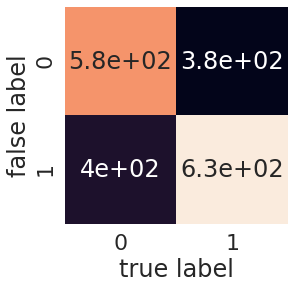

time: 189 ms (started: 2021-05-17 21:58:51 +00:00)


In [ ]:
import seaborn as sns
sns.set(font_scale=2)
def plot_confusion_matrix(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,
                  cbar=False)
    plt.xlabel("true label")
    plt.ylabel("false label")
plot_confusion_matrix(y_test,y_pred)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)#visualising confusion matrix

In [ ]:
m=LogisticRegression(solver='liblinear',C=0.01).fit(X_train,y_train)
m.score(X_test,y_test)#best score obtained

0.5225

time: 72.3 ms (started: 2021-05-17 22:17:53 +00:00)


In [ ]:
m = RandomForestClassifier(n_estimators=160, min_samples_leaf=3, max_depth=None, min_samples_split=18 )
m.fit(X_train, y_train)
m.score(X_test,y_test)

0.625

time: 2.83 s (started: 2021-05-17 22:18:58 +00:00)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.5375

time: 276 ms (started: 2021-05-17 22:21:24 +00:00)
